In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# carregando o dataset corretamente e, neste caso, usa o separador ';'
data = pd.read_csv(r'C:\Users\pablo\Downloads\dengue_resid_csv.csv', sep=';')

In [3]:
# exibe as 5 primeiras linhas do dataset
data.head()

,Ano,Semana_Epidemiologica,Cod_IBGE,CRS,Nome_Municipio,Sexo,Faixa_Etaria,Raca_Cor,Obitos,Investigacao,Descartados,Inconclusivos,Autoctones,Confirmados,Notificacoes
0,2017,38,431870,1,São Leopoldo,M,De 30 a 39 anos,Branca,0,0,1,0,0,0,1
1,2017,8,430466,3,Capão do Leão,M,De 10 a 14 anos,Branca,0,0,1,0,0,0,1
2,2017,24,431320,5,Nova Petrópolis,F,De 15 a 19 anos,Branca,0,0,1,0,0,0,1
3,2017,48,431490,1,Porto Alegre,F,De 20 a 29 anos,Branca,0,0,1,0,0,0,1
4,2017,16,432300,1,Viamão,F,De 05 a 09 anos,Branca,0,0,1,0,0,0,1


In [4]:
# Obter um resumo conciso da estrutura e das informações do DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171738 entries, 0 to 171737
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Ano                    171738 non-null  int64 
 1   Semana_Epidemiologica  171738 non-null  int64 
 2   Cod_IBGE               171738 non-null  int64 
 3   CRS                    171738 non-null  int64 
 4   Nome_Municipio         171738 non-null  object
 5   Sexo                   171709 non-null  object
 6   Faixa_Etaria           171738 non-null  object
 7   Raca_Cor               171738 non-null  object
 8   Obitos                 171738 non-null  int64 
 9   Investigacao           171738 non-null  int64 
 10  Descartados            171738 non-null  int64 
 11  Inconclusivos          171738 non-null  int64 
 12  Autoctones             171738 non-null  int64 
 13  Confirmados            171738 non-null  int64 
 14  Notificacoes           171738 non-null  int64 
dtype

In [5]:
# Funcão que agrupa as semanas epidemiológicas em estações do ano
def adc_estacao(semana):
    if 1 <= semana <= 13:
        return 'Verão'
    elif 14 <= semana <= 26:
        return 'Outono'
    elif 27 <= semana <= 39:
        return 'Inverno'
    elif 40 <= semana <= 52:
        return 'Primavera'
    else:
        return 'Semana Inválida'

In [6]:
# Cria uma coluna com as estações do ano
data['Estacao_Ano'] = data['Semana_Epidemiologica'].apply(adc_estacao)

In [7]:
# Agrupa os dados pela coluna 'Estacao_Ano' e calcula um resumo por estação
dado_agrupado = data.groupby('Estacao_Ano').size()

# Exibe o número de registros por estação do ano
dado_agrupado

Estacao_Ano
Inverno            11654
Outono             95477
Primavera          10487
Semana Inválida       27
Verão              54093
dtype: int64

A análise dos dados revela que a **estação do ano** com maior incidência de casos de Dengue é o **Outono**. No entanto, observa-se também que o **Verão** apresenta uma incidência significativamente mais alta em comparação às outras estações. Além disso, nota-se que há 27 semanas em que a estação correspondente não foi informada.

In [8]:
# Agrupa os dados por Nome_Municipio e calcula a média de Confirmados com a função mean().
casos_municipio = data.groupby('Nome_Municipio')['Confirmados'].mean()

# Encontra o município com mais casos
top_municipio = casos_municipio.idxmax()
top_media_casos = casos_municipio.max()

In [9]:
print(f'O município com maior incidência de casos foi {top_municipio} com {top_media_casos:.2} casos de dengue confirmados em média ao longo de 10 anos.')

O município com maior incidência de casos foi Santa Rosa com 8.3 casos de dengue confirmados em média ao longo de 10 anos.


In [10]:
# Filtra os dados para Santa Rosa e Porto Alegre
dados_filtrados = data[data['Nome_Municipio'].isin(['Santa Rosa', 'Porto Alegre'])]

# Compara a média de casos confirmados entre Santa Rosa e Porto Alegre
casos_comparacao = dados_filtrados.groupby('Nome_Municipio')['Confirmados'].mean()

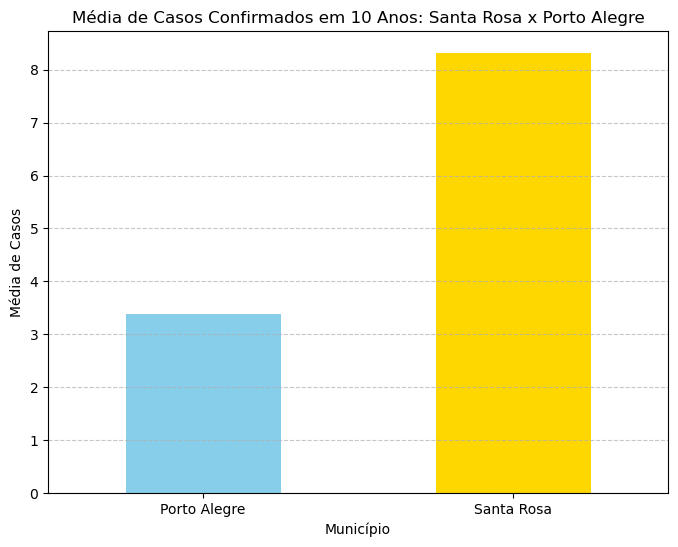

In [11]:
casos_comparacao.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'gold'])
plt.title('Média de Casos Confirmados em 10 Anos: Santa Rosa x Porto Alegre', fontsize = 12)
plt.ylabel('Média de Casos', fontsize = 10)
plt.xlabel('Município', fontsize = 10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

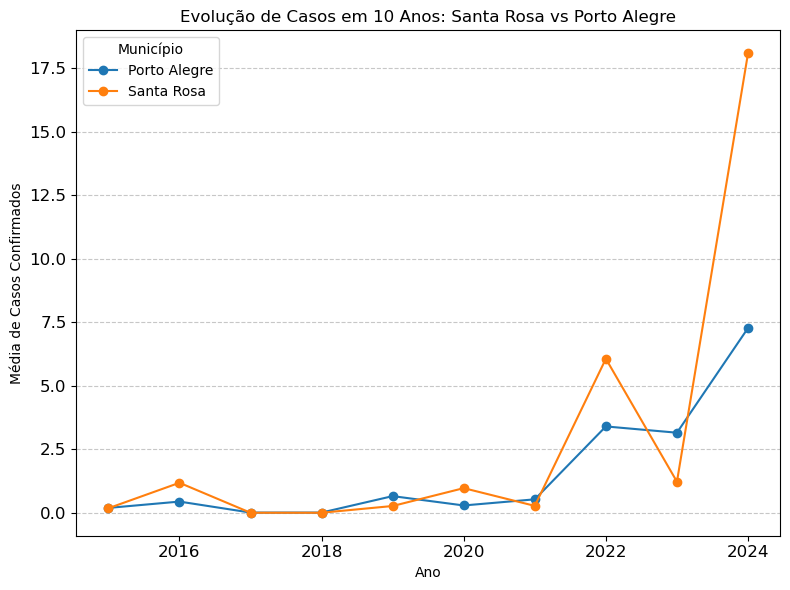

In [12]:
# Evolução temporal dos casos
evolucao_casos = dados_filtrados.groupby(['Ano', 'Nome_Municipio'])['Confirmados'].mean().unstack()

# Gráfico de linhas
evolucao_casos.plot(figsize=(8, 6), marker='o', title='Evolução de Casos em 10 Anos: Santa Rosa vs Porto Alegre', fontsize = 12)
plt.xlabel('Ano', fontsize = '10')
plt.ylabel('Média de Casos Confirmados', fontsize = '10')
plt.legend(title='Município', fontsize = '10')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Conclusão


Embora Porto Alegre-RS apresente o maior número total de casos confirmados de dengue, Santa Rosa-RS destaca-se por ter, ao longo de 10 anos, a maior média de incidência de casos confirmados. Isso é evidente nos gráficos apresentados. A partir desses dados, podemos levantar alguns insights: 

1. Santa Rosa pode estar sendo mais eficaz do que outros municípios, inclusive a capital, no rastreamento e notificação de casos confirmados, o que explicaria a alta média de incidência registrada.  
2. Por outro lado, é possível que o município esteja enfrentando dificuldades no combate à doença, resultando em uma maior incidência de casos confirmados.  

Essas hipóteses indicam a necessidade de uma análise mais aprofundada para compreender as razões por trás desses números e orientar ações mais eficazes no enfrentamento da dengue.